In [ ]:
import pandas as pd

data = pd.read_csv('/content/Data.csv')
data.head()

x     z
0 -10 -40.5
1  -9 -34.5
2  -8 -31.5
3  -7 -25.5
4  -6 -19.5

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load dataset
data = pd.read_csv('/content/Data.csv')

# Extracting variables
x = data['x'].values
z = data['z'].values

# Define the range for slope (m) and intercept (c)
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)
M, C = np.meshgrid(m_values, c_values)  # Cross product for the error surface grid

# Compute error surface
errors = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        current_m = M[i, j]
        current_c = C[i, j]
        y_pred = current_m * x + current_c
        errors[i, j] = np.sum(np.abs(z - y_pred))  # Sum of absolute errors



# Gradient Descent for minimizing the error
slope, bias = 0, 0  # Initial values
learning_rate = 0.0001
epochs = 10000
n = float(len(x))

# To store values for plotting the gradient descent path
slope_values, bias_values = [slope], [bias]

for i in range(epochs):
    y_pred = slope * x + bias
    dm = -np.sum(np.sign(z - y_pred) * x) / n
    dc = -np.sum(np.sign(z - y_pred)) / n
    slope -= learning_rate * dm
    bias -= learning_rate * dc

    slope_values.append(slope)
    bias_values.append(bias)

# Plotting the error surface with gradient descent path using Plotly
fig = go.Figure(data=[go.Surface(z=errors, x=M, y=C, colorscale='earth', opacity=0.8)])

# Calculate errors along the gradient descent path for plot
error_path = [np.sum(np.abs(z - (slope_values[i] * x + bias_values[i]))) for i in range(len(slope_values))]

fig.add_trace(go.Scatter3d(
    x=slope_values,
    y=bias_values,
    z=error_path,
    mode='lines+markers',
    line=dict(color='red', width=2),
    marker=dict(size=3)
))

fig.update_layout(
    scene=dict(
        xaxis_title='m (slope)',
        yaxis_title='c (intercept)',
        zaxis_title='Error'
    ),
    title='Error Surface and Gradient Descent Path'
)

fig.show()


In [ ]:
#Gradient descent alogrithm

slope = 0
bias = 0
n = float(len(x))

learning_rate = 0.0005
epoch = 1000

for i in range(epoch):
  y_pred = slope * x + bias
  dm = (-2/n) * sum(x * (z - y_pred))
  dc = (-2/n) * sum(z - y_pred)
  slope = slope - learning_rate * dm
  bias = bias - learning_rate * dc

print(slope, bias)

4.146753246753235 1.520541954717445


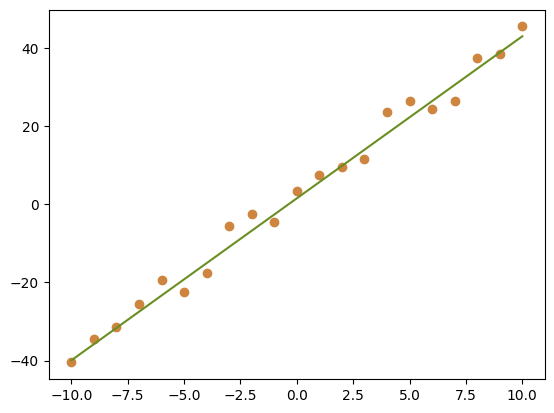

In [ ]:
prediction = slope*x + bias

plt.scatter(x,z, color='peru')
plt.plot([min(x), max(x)], [min(prediction), max(prediction)], color='olivedrab')
plt.show()

In [ ]:
# gda 3 types

In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load dataset
data = pd.read_csv('/content/Data.csv')
x = data['x'].values
z = data['z'].values

# Define range for slope (m) and intercept (c)
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)
M, C = np.meshgrid(m_values, c_values)  # Cross product for the error surface grid

# Initialize error surfaces
errors_lr = np.zeros_like(M)      # Linear regression
errors_ridge = np.zeros_like(M)   # Ridge regression
errors_lasso = np.zeros_like(M)   # Lasso regression

# Regularization parameters
lambda_ridge = 20.0
lambda_lasso = 15.0

# Compute error surfaces for Linear, Ridge, and Lasso models
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        current_m = M[i, j]
        current_c = C[i, j]

        # Prediction
        y_pred = current_m * x + current_c

        # Linear regression error
        errors_lr[i, j] = np.sum(np.abs(z - y_pred))

        # Ridge regression error
        errors_ridge[i, j] = np.sum(np.abs(z - y_pred)) + lambda_ridge * (current_m ** 2)

        # Lasso regression error
        errors_lasso[i, j] = np.sum(np.abs(z - y_pred)) + lambda_lasso * np.abs(current_m)

# Gradient Descent for minimizing the error in Linear, Ridge, and Lasso models
def gradient_descent(x, y, lambda_reg=0, penalty="none", epochs=1000, lr=0.0001):
    slope, bias = 0, 0
    slope_values, bias_values = [slope], [bias]
    n = float(len(x))

    for _ in range(epochs):
        y_pred = slope * x + bias
        dm = -np.sum(np.sign(y - y_pred) * x) / n
        dc = -np.sum(np.sign(y - y_pred)) / n

        # Apply regularization
        if penalty == "ridge":
            dm += 2 * lambda_reg * slope
        elif penalty == "lasso":
            dm += lambda_reg * np.sign(slope)

        # Update parameters
        slope -= lr * dm
        bias -= lr * dc

        slope_values.append(slope)
        bias_values.append(bias)

    return slope_values, bias_values

# Gradient Descent paths for each model
slope_values_lr, bias_values_lr = gradient_descent(x, z, epochs=500, lr=0.0001)
slope_values_ridge, bias_values_ridge = gradient_descent(x, z, lambda_reg=lambda_ridge, penalty="ridge", epochs=500, lr=0.0001)
slope_values_lasso, bias_values_lasso = gradient_descent(x, z, lambda_reg=lambda_lasso, penalty="lasso", epochs=500, lr=0.0001)

# Calculate error paths for plotting
error_path_lr = [np.sum(np.abs(z - (m * x + b))) for m, b in zip(slope_values_lr, bias_values_lr)]
error_path_ridge = [np.sum(np.abs(z - (m * x + b))) + lambda_ridge * (m ** 2) for m, b in zip(slope_values_ridge, bias_values_ridge)]
error_path_lasso = [np.sum(np.abs(z - (m * x + b))) + lambda_lasso * np.abs(m) for m, b in zip(slope_values_lasso, bias_values_lasso)]

# Plotting with Plotly for each model separately

# Linear Regression Surface
fig_lr = go.Figure(data=[
    go.Surface(z=errors_lr, x=M, y=C, colorscale='earth', opacity=0.7, name="Linear Regression"),
    go.Scatter3d(x=slope_values_lr, y=bias_values_lr, z=error_path_lr, mode='lines+markers', line=dict(color='blue', width=2), marker=dict(size=3), name="Linear Regression Path")
])
fig_lr.update_layout(scene=dict(xaxis_title='m (slope)', yaxis_title='c (intercept)', zaxis_title='Error'), title='Linear Regression Error Surface')

# Ridge Regression Surface
fig_ridge = go.Figure(data=[
    go.Surface(z=errors_ridge, x=M, y=C, colorscale='earth', opacity=0.7, name="Ridge Regression"),
    go.Scatter3d(x=slope_values_ridge, y=bias_values_ridge, z=error_path_ridge, mode='lines+markers', line=dict(color='red', width=2), marker=dict(size=3), name="Ridge Regression Path")
])
fig_ridge.update_layout(scene=dict(xaxis_title='m (slope)', yaxis_title='c (intercept)', zaxis_title='Error'), title='Ridge Regression Error Surface')

# Lasso Regression Surface
fig_lasso = go.Figure(data=[
    go.Surface(z=errors_lasso, x=M, y=C, colorscale='earth', opacity=0.7, name="Lasso Regression"),
    go.Scatter3d(x=slope_values_lasso, y=bias_values_lasso, z=error_path_lasso, mode='lines+markers', line=dict(color='green', width=2), marker=dict(size=3), name="Lasso Regression Path")
])
fig_lasso.update_layout(scene=dict(xaxis_title='m (slope)', yaxis_title='c (intercept)', zaxis_title='Error'), title='Lasso Regression Error Surface')

# Display each figure
fig_lr.show()
fig_ridge.show()
fig_lasso.show()


# **Regression model for stock market**


install if necessary:

!pip install scikit-learn


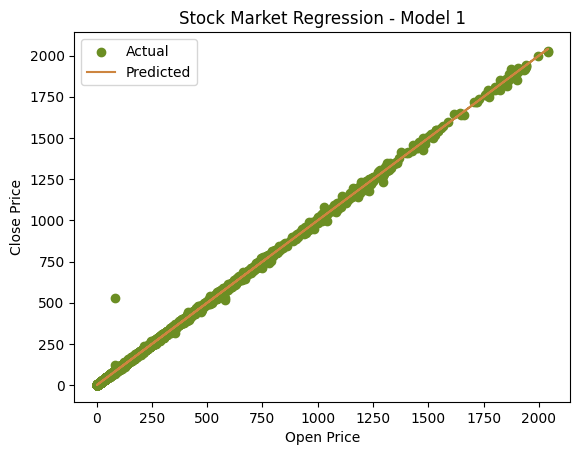

(4.061019407735234, 0.9995667035589366)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/content/all_stocks_5yr.csv')

# Select relevant columns for the analysis
X = data[['open']]  # Initial Features (Model 1)
y = data['close']    # Target variable

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Reshape y_train to handle imputation, then flatten back to 1D
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Model 1: Linear regression with 'open' as the feature
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Predictions
y_pred_1 = model_1.predict(X_test)

# Evaluation metrics for Model 1
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

# Plot predictions vs actual values for Model 1
plt.scatter(X_test, y_test, color='olivedrab', label='Actual')
plt.plot(X_test, y_pred_1, color='peru', label='Predicted')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Stock Market Regression - Model 1')
plt.legend()
plt.show()

# Print evaluation metrics for Model 1
mse_1, r2_1


In [ ]:
# Model 2: Adding 'high' and 'volume' as additional features
X = data[['open', 'high', 'volume']]  # Additional Features

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model 2: Linear regression with 'open', 'high', and 'volume' as features
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Predictions for Model 2
y_pred_2 = model_2.predict(X_test)

# Evaluation metrics for Model 2
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)

# Print evaluation metrics for Model 2
mse_2, r2_2


(2.847099420475351, 0.9996962245381306)

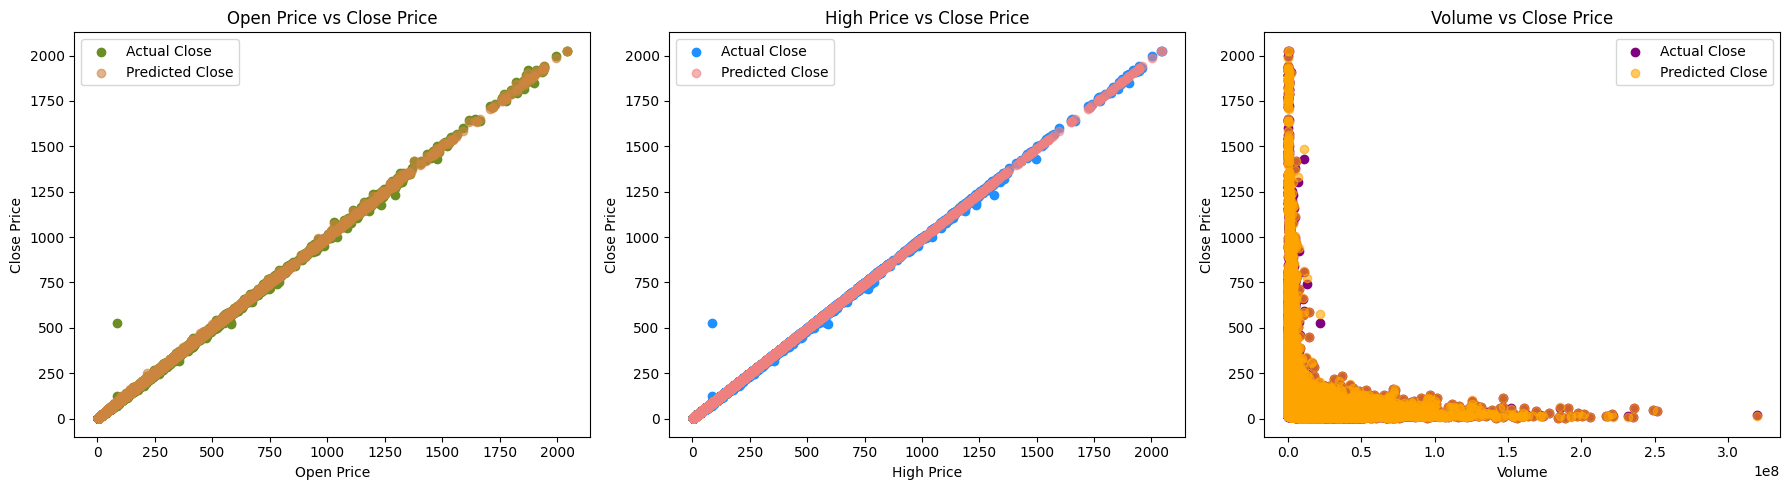

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict using the second model
y_pred_2 = model_2.predict(X_test)

# Scatter plot for each feature vs. actual and predicted close prices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Open vs Close
axes[0].scatter(X_test[:, 0], y_test, color='olivedrab', label='Actual Close')
axes[0].scatter(X_test[:, 0], y_pred_2, color='peru', label='Predicted Close', alpha=0.6)
axes[0].set_title('Open Price vs Close Price')
axes[0].set_xlabel('Open Price')
axes[0].set_ylabel('Close Price')
axes[0].legend()

# Plot High vs Close
axes[1].scatter(X_test[:, 1], y_test, color='dodgerblue', label='Actual Close')
axes[1].scatter(X_test[:, 1], y_pred_2, color='lightcoral', label='Predicted Close', alpha=0.6)
axes[1].set_title('High Price vs Close Price')
axes[1].set_xlabel('High Price')
axes[1].set_ylabel('Close Price')
axes[1].legend()

# Plot Volume vs Close
axes[2].scatter(X_test[:, 2], y_test, color='purple', label='Actual Close')
axes[2].scatter(X_test[:, 2], y_pred_2, color='orange', label='Predicted Close', alpha=0.6)
axes[2].set_title('Volume vs Close Price')
axes[2].set_xlabel('Volume')
axes[2].set_ylabel('Close Price')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.314e+05, tolerance: 4.711e+05
  model = cd_fast.enet_coordinate_descent(


  Metric  Linear Regression  Ridge Regression  Lasso Regression
0    MSE           2.058218          2.058218          3.758447
1    MAE           0.342673          0.342674          0.692514
2    R^2           0.999780          0.999780          0.999599
3   RMSE           1.434649          1.434649          1.938671
4   MAPE           0.427929          0.427929          0.866855


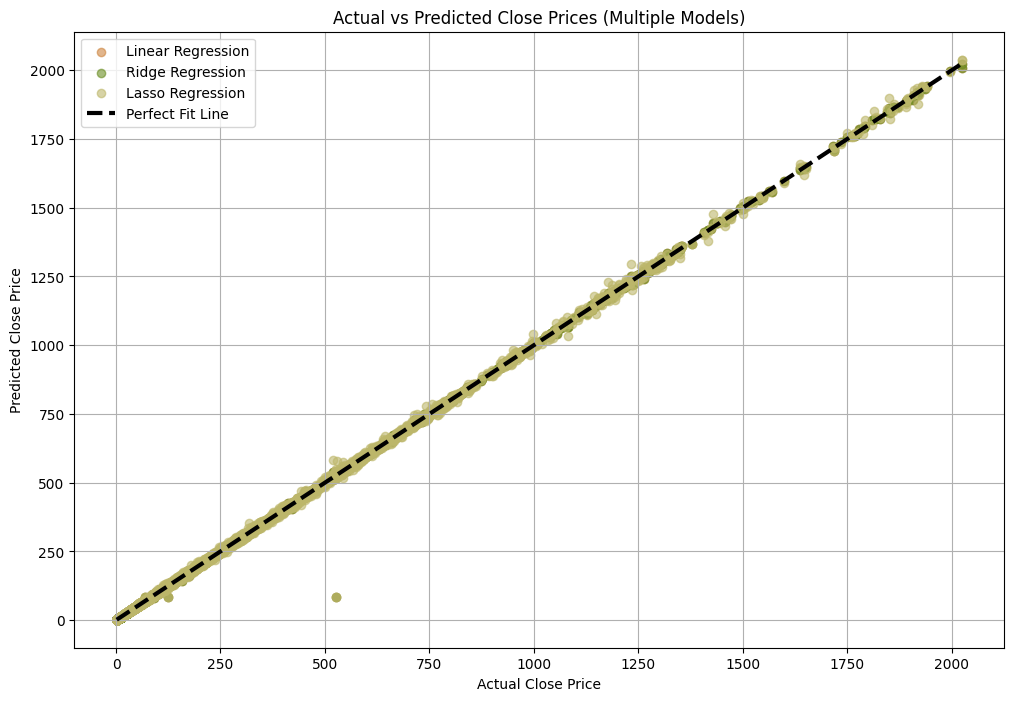

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset (change the path if needed)
data = pd.read_csv('/content/all_stocks_5yr.csv')

# Selecting multiple features for regression
features = ['open', 'high', 'low', 'volume']
X = data[features]
y = data['close']

# Imputation to handle NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Ridge Regression Model
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

# Lasso Regression Model
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE calculation
    return mse, mae, r2, rmse, mape

# Calculate metrics for each model
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_ridge = calculate_metrics(y_test, y_pred_ridge)
metrics_lasso = calculate_metrics(y_test, y_pred_lasso)

# Prepare the report
report = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R^2', 'RMSE', 'MAPE'],
    'Linear Regression': metrics_lr,
    'Ridge Regression': metrics_ridge,
    'Lasso Regression': metrics_lasso
})

# Print the report
print(report)

# Plotting the actual vs predicted for all models
plt.figure(figsize=(12, 8))

# Linear Regression
plt.scatter(y_test, y_pred_lr, label="Linear Regression", color='peru', alpha=0.6)

# Ridge Regression
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", color='olivedrab', alpha=0.6)

# Lasso Regression
plt.scatter(y_test, y_pred_lasso, label="Lasso Regression", color='darkkhaki', alpha=0.6)

# Perfect fit line (for reference)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label="Perfect Fit Line")

# Add plot labels and title
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Prices (Multiple Models)')
plt.legend()
plt.grid(True)
plt.show()


Best performance: Linear and Ridge


MSE, MAE, RMSE, MAPE lesser than lasso.

R^2 better than Lasso by ~0.0001.